##Member Team:
##- Arrafiatu Arsy Almas 101320068
##- Kemal Reviansyah Hermawanto 101320118

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import numpy as np


In [26]:
df=pd.read_excel('Chapter4_Geologic_DataSet.xlsx')
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,0.063221,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,0.008410,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,0.032000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,0.057000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,0.065000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,0.070000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,0.077000,12474.000000


In [27]:
df.drop(['TOC, fraction'], axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

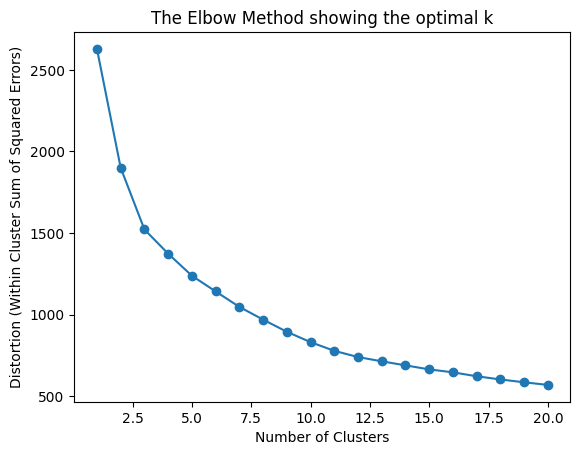

In [29]:
from sklearn.cluster import KMeans
distortions=[]
for i in range (1,21):
  km=KMeans(n_clusters=i,random_state=1000,
  init='k-means++', n_init=1000, max_iter=500)  
  km.fit(df_scaled)
  distortions.append(km.inertia_)
plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

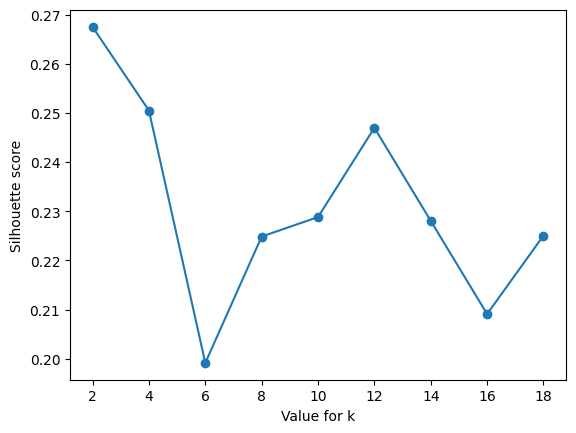

In [30]:
from sklearn.metrics import silhouette_score
k = [2, 4, 6, 8, 10, 12, 14,16,18]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled,kmeans.labels_)
    score.append(silhouette_score(df_scaled,kmeans.labels_))

plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.show()

In [31]:
print(distortions)

[2628.0, 1900.0636934990364, 1522.451811496321, 1374.2291078433182, 1239.181105400057, 1143.0882975129625, 1048.4631467422662, 970.3736082269522, 896.1826776892003, 832.4729691513643, 779.3373555936984, 741.172848328658, 715.038939109369, 690.3421798639846, 665.6744894042824, 647.5003930208455, 623.6081161844388, 603.9449742399261, 586.5591687345313, 570.5130615860874]


In [32]:
n=5
kmeans=KMeans(n_clusters=n,random_state=1000,init='k-means++',
n_init=1000, max_iter=500)
kmeans=kmeans.fit(df_scaled)
print(kmeans.cluster_centers_)

[[ 0.50556862  0.51014732  1.65653959 -0.63852816 -0.93482447 -0.86491917]
 [-0.79851789 -0.91160602  0.01932449 -0.79280911  0.09708232  0.78860495]
 [-0.20075366 -0.08050923 -0.75998037  0.6263323   0.70807171 -0.36482086]
 [ 1.16931101 -0.62966381  0.43786713 -0.72785273 -0.38725931  0.52130383]
 [-0.24555063  1.39279735 -0.68008424  1.29982849  0.04465267 -0.35212203]]


In [33]:
labels = kmeans.labels_
labels

array([1, 3, 2, 2, 2, 4, 0, 1, 3, 1, 4, 2, 4, 4, 3, 0, 1, 4, 1, 3, 0, 1,
       1, 3, 0, 2, 2, 2, 1, 2, 4, 4, 3, 4, 2, 4, 0, 3, 1, 2, 2, 4, 4, 2,
       0, 4, 3, 0, 1, 4, 3, 3, 1, 1, 1, 3, 1, 1, 3, 4, 2, 1, 1, 2, 2, 1,
       1, 0, 0, 1, 2, 2, 1, 1, 3, 0, 1, 4, 4, 0, 2, 2, 3, 3, 3, 1, 2, 4,
       3, 1, 0, 0, 1, 1, 3, 4, 4, 4, 2, 4, 2, 1, 3, 0, 2, 2, 2, 1, 4, 2,
       2, 3, 1, 1, 1, 0, 1, 3, 1, 0, 2, 4, 2, 3, 2, 0, 2, 0, 0, 3, 1, 0,
       2, 2, 0, 2, 4, 0, 1, 3, 1, 3, 4, 1, 2, 2, 1, 0, 2, 1, 4, 1, 4, 2,
       3, 1, 0, 1, 2, 0, 4, 3, 1, 0, 0, 2, 4, 2, 1, 0, 1, 2, 0, 4, 4, 2,
       1, 1, 1, 1, 1, 2, 4, 0, 4, 4, 4, 4, 2, 2, 4, 2, 1, 1, 2, 4, 4, 3,
       1, 0, 1, 0, 1, 3, 3, 0, 1, 1, 3, 1, 0, 0, 4, 1, 4, 2, 2, 4, 2, 3,
       4, 4, 4, 4, 2, 0, 0, 0, 4, 4, 4, 2, 3, 3, 1, 3, 2, 1, 2, 2, 3, 3,
       3, 0, 0, 4, 2, 2, 4, 2, 1, 3, 0, 0, 3, 3, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 4, 3, 1, 3, 1, 0, 2, 2, 4, 2, 2, 1, 3, 1, 1, 2, 1, 2, 4, 0, 4,
       4, 2, 4, 2, 1, 1, 0, 3, 1, 3, 2, 2, 0, 0, 0,

In [34]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['clusters']=labels
df_scaled

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft",clusters
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,0.888564,1
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,-0.003779,3
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,2
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,2
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,-0.862267,2
...,...,...,...,...,...,...,...
433,-1.151862,-0.579552,0.196118,-0.530778,0.539195,-0.399167,1
434,-0.559012,0.878715,-0.306219,1.072538,-0.402962,0.182428,4
435,-0.032034,0.968917,-0.306219,0.270880,-0.717014,-1.121022,4
436,-0.526075,0.502873,-1.059724,1.339758,0.539195,0.558470,2


In [35]:
Group_by=df_scaled.groupby(by='clusters').mean()
Group_by

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
clusters,,,,,,
0,0.505569,0.510147,1.656540,-0.638528,-0.934824,-0.864919
1,-0.798518,-0.911606,0.019324,-0.792809,0.097082,0.788605
2,-0.200754,-0.080509,-0.759980,0.626332,0.708072,-0.364821
3,1.169311,-0.629664,0.437867,-0.727853,-0.387259,0.521304
4,-0.245551,1.392797,-0.680084,1.299828,0.044653,-0.352122


In [36]:
df_scaled.groupby(by='clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
clusters,,,,,,
0,62,62,62,62,62,62
1,103,103,103,103,103,103
2,106,106,106,106,106,106
3,80,80,80,80,80,80
4,87,87,87,87,87,87


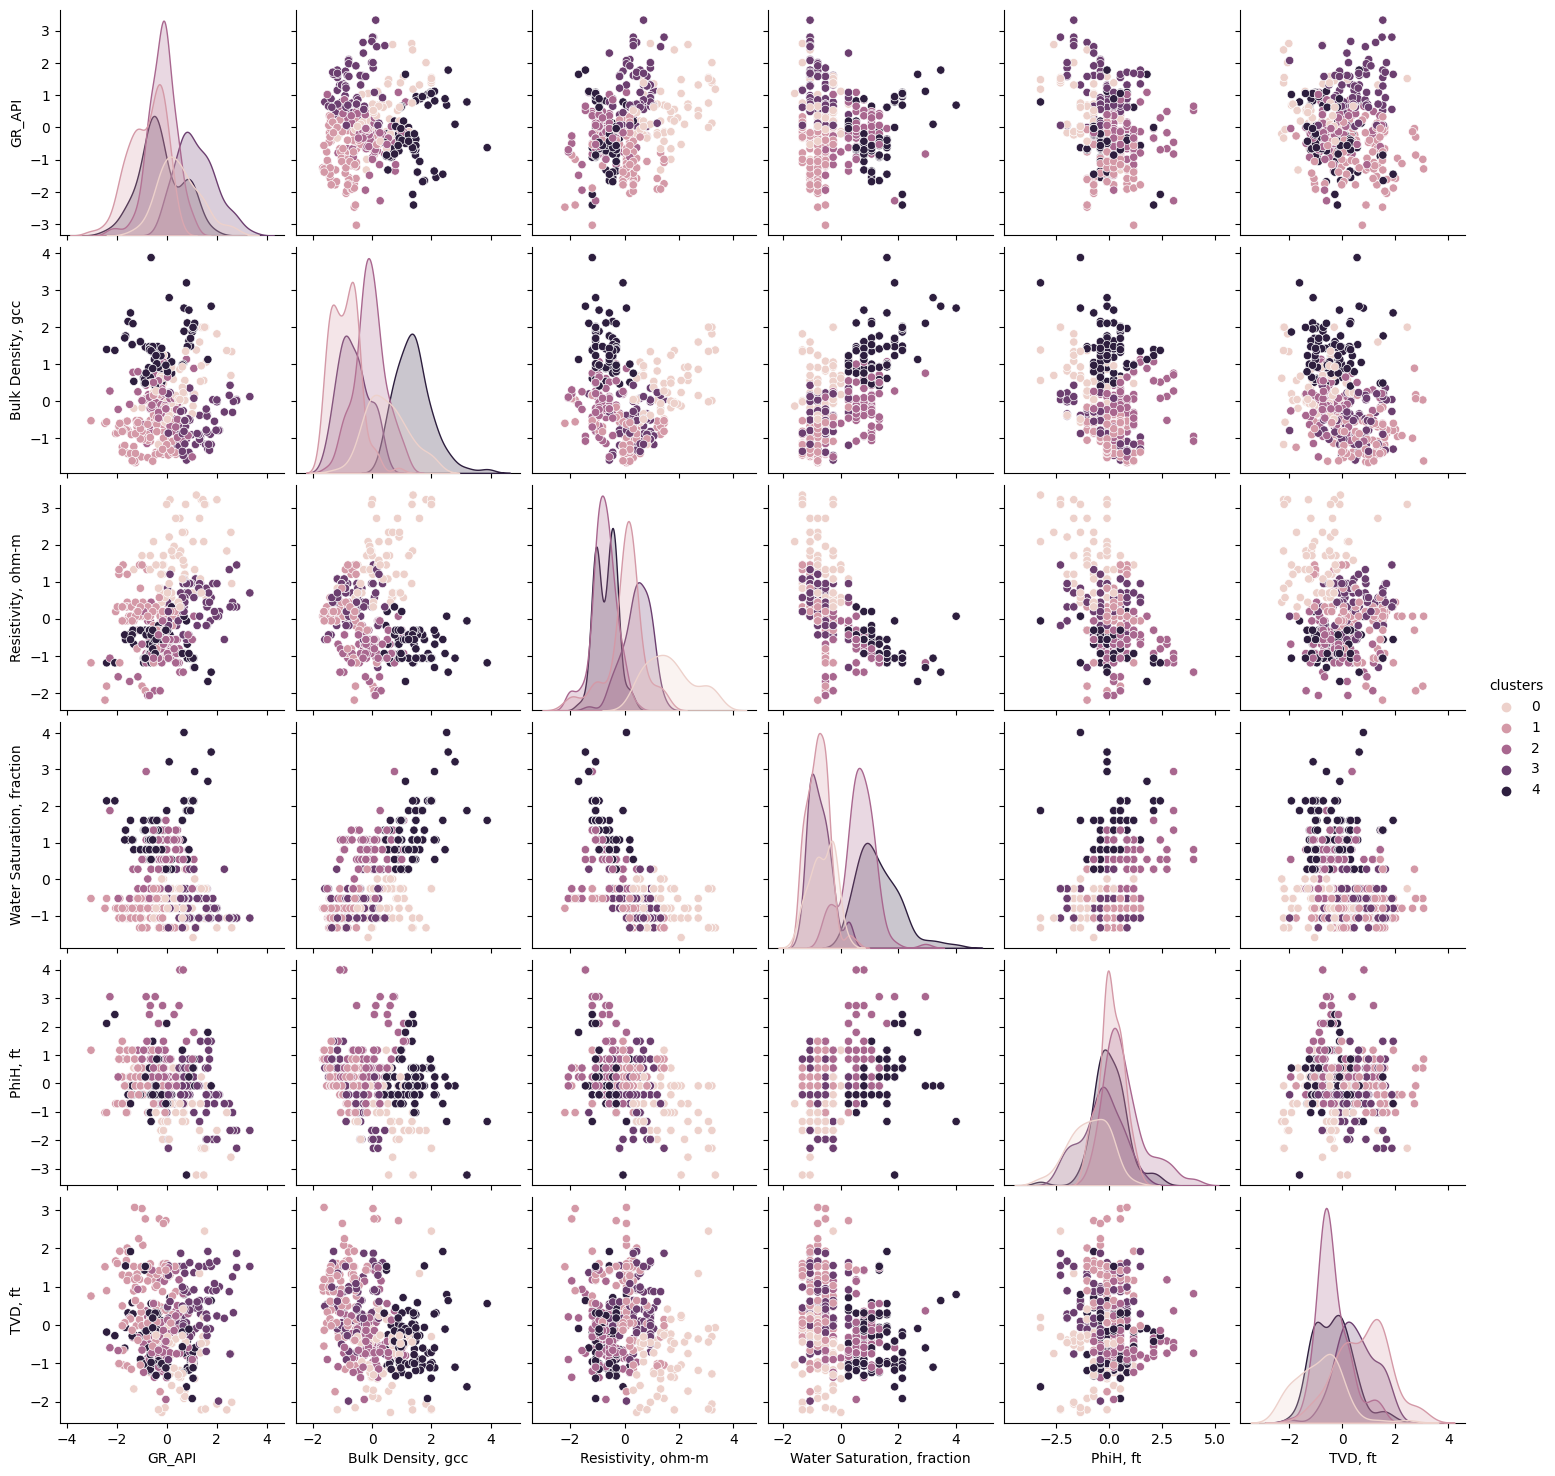

In [37]:
sns.pairplot(df_scaled, hue="clusters")

In [38]:
ti = df_scaled.drop(["GR_API","Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"], axis=1)
ti

,clusters
0,1
1,3
2,2
3,2
4,2
...,...
433,1
434,4
435,4
436,2


In [39]:
df.columns

Index(['GR_API', 'Bulk Density, gcc', 'Resistivity, ohm-m',
       'Water Saturation, fraction', 'PhiH, ft', 'TVD, ft'],
      dtype='object')

In [40]:
df['clusters'] = ti

<Axes: xlabel='clusters', ylabel='GR_API'>

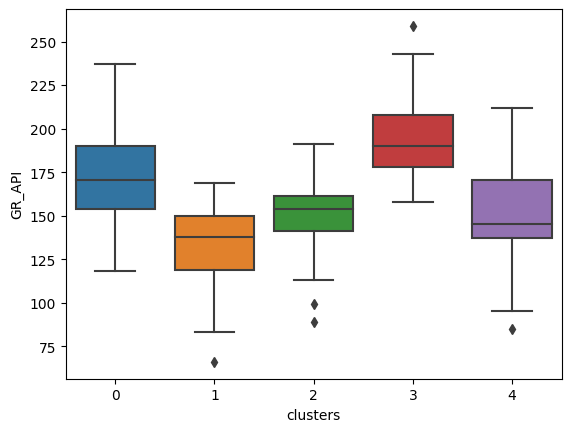

In [41]:
sns.boxplot(df, x="clusters", y="GR_API")

<Axes: xlabel='clusters', ylabel='Bulk Density, gcc'>

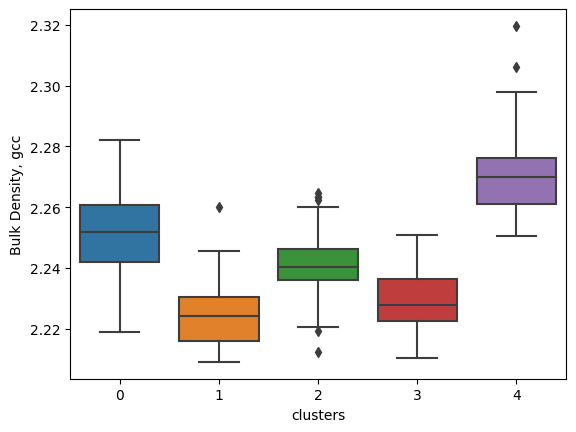

In [42]:
sns.boxplot(df, x="clusters", y="Bulk Density, gcc")

<Axes: xlabel='clusters', ylabel='Resistivity, ohm-m'>

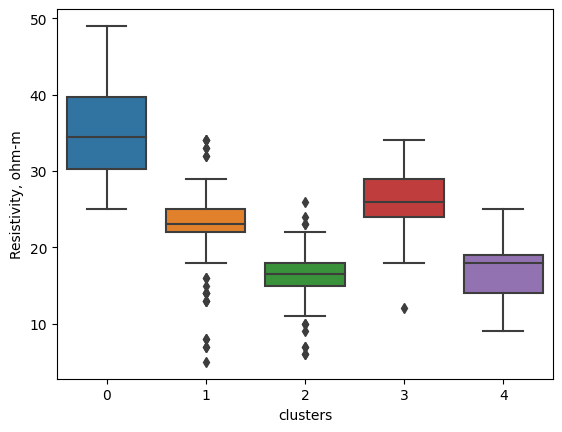

In [43]:
sns.boxplot(df, x="clusters", y="Resistivity, ohm-m")

<Axes: xlabel='clusters', ylabel='Water Saturation, fraction'>

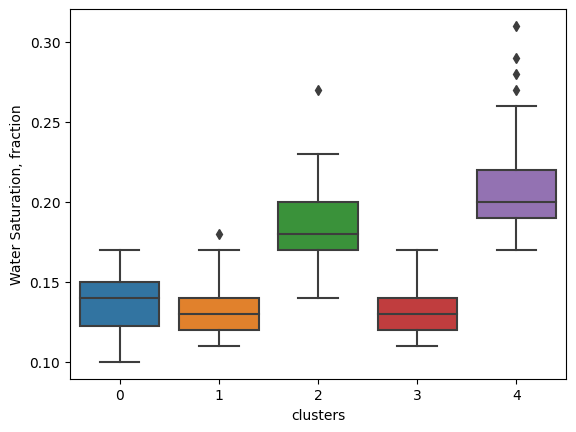

In [44]:
sns.boxplot(df, x="clusters", y="Water Saturation, fraction")

<Axes: xlabel='clusters', ylabel='PhiH, ft'>

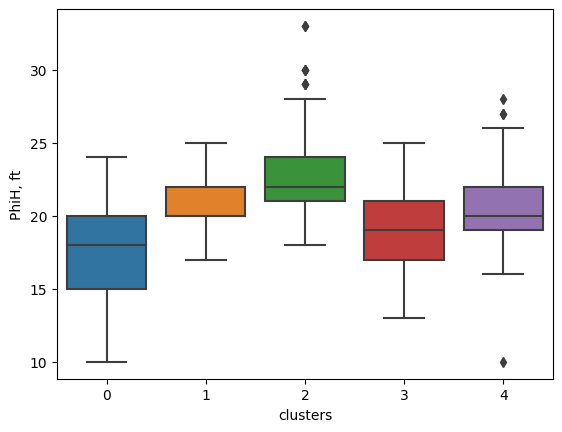

In [45]:
sns.boxplot(df, x="clusters", y="PhiH, ft")

<Axes: xlabel='clusters', ylabel='TVD, ft'>

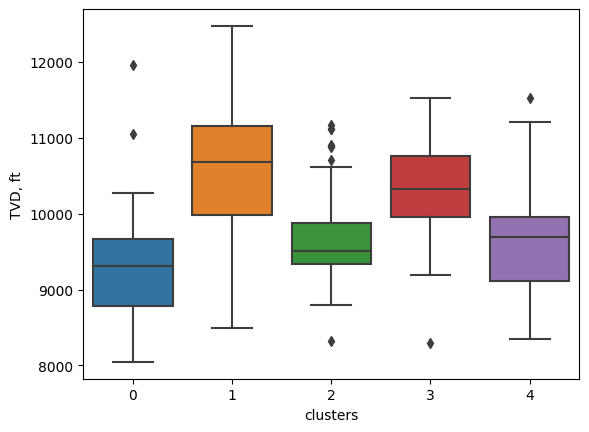

In [46]:
sns.boxplot(df, x="clusters", y="TVD, ft")